In [2]:
W1 = randn(2, 4);
b1 = randn(1, 4);
x = randn(10, 2);

In [3]:
W1

2×4 Array{Float64,2}:
 -0.176466  -0.134384  0.48977    0.177343
  2.03927    0.214369  0.357858  -0.355641

In [4]:
b1

1×4 Array{Float64,2}:
 0.668485  -1.27137  -1.25461  2.0158

In [5]:
x

10×2 Array{Float64,2}:
  1.88128    -0.356403
 -1.1031     -1.60226 
 -0.823444    0.606247
  0.347554    1.68827 
 -0.318608   -0.553743
  1.12202     0.403993
  0.922545    0.474341
  0.0224175   0.469421
 -0.0272162   0.972226
  0.607969   -0.730856

In [6]:
h = x * W1 .+ b1

10×4 Array{Float64,2}:
 -0.390301  -1.60058   -0.460751  2.47618
 -2.4043    -1.4666    -2.36825   2.39   
  2.0501    -1.03075   -1.44095   1.65416
  4.05      -0.956159  -0.480224  1.47701
 -0.404525  -1.34726   -1.60881   2.15623
  1.29434   -1.33554   -0.560503  2.0711 
  1.473     -1.29366   -0.633025  2.01071
  1.62181   -1.17375   -1.07564   1.85283
  2.65592   -1.05929   -0.920017  1.66521
 -0.929216  -1.50974   -1.21838   2.38354

In [7]:
using PyPlot

In [8]:
sigmoid(x) = 1 ./ (1 .+ exp.(-x))

sigmoid (generic function with 1 method)

In [9]:
x = -5:0.1:5;
y = sigmoid(x);

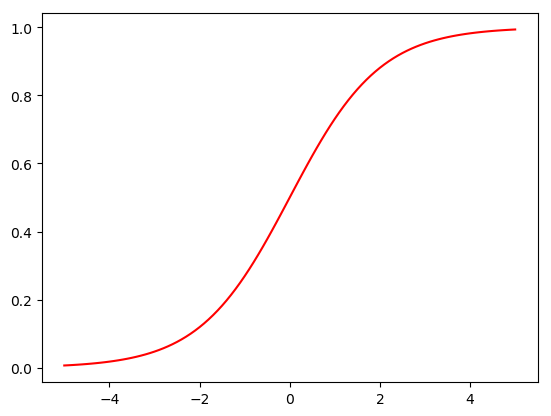

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000301D3320>

In [10]:
plot(x, y, "r-")

In [11]:
x = randn(10, 2)
W1 = randn(2, 4)
b1 = randn(1, 4)
W2 = randn(4, 3)
b2 = randn(1, 3)
h = x * W1 .+ b1;
a = sigmoid(h)
s = a * W2 .+ b2

10×3 Array{Float64,2}:
 0.555128  -1.42476   -2.3792 
 1.05881   -1.3311    -2.59861
 0.709513  -1.35029   -2.42585
 0.837656  -1.41651   -2.57508
 1.25432   -0.965902  -2.32983
 0.768845  -1.41135   -2.52542
 1.05916   -1.48453   -2.80683
 1.66538   -1.30426   -2.90848
 0.612459  -1.46365   -2.42793
 1.08732   -1.29788   -2.57057

# Neural Network unit

In [12]:
abstract type AbstractLayer
end

In [13]:
struct SigmoidLayer{T} <: AbstractLayer
    # out::T
end

In [14]:
function forward(l::SigmoidLayer{T}, x::AbstractArray{T}) where {T}
    # l.out =
    1 ./ (1 .+ exp.(-x))
end

# function backward(l::SigmoidLayer{T}, dout::T) where {T}
#    dout .* (1 .- l.out) .* l.out
# end

forward (generic function with 1 method)

In [15]:
mutable struct AffineLayer{T} <: AbstractLayer
    W::AbstractMatrix{T}
    b::AbstractVector{T}
    x::AbstractArray{T}
    dW::AbstractMatrix{T}
    db::AbstractVector{T}
    function (::Type{AffineLayer})(W::AbstractMatrix{T}, b::AbstractVector{T}) where {T}
        layer = new{T}()
        layer.W = W
        layer.b = b
        layer
    end
end

In [16]:
alayer = AffineLayer(randn(3, 2), randn(3))

AffineLayer{Float64}([0.708196 1.602; 0.238669 0.291523; 0.251338 1.58125], [-0.283056, 0.400715, -0.637368], #undef, #undef, #undef)

In [17]:
function forward(layer::AffineLayer{T}, x::AbstractArray{T}) where {T}
    layer.x = x
    # println(size(layer.W))
    layer.W * x .+ layer.b
end
alayer = AffineLayer(randn(3, 2), randn(3))
forward(alayer, [1.0; 2.0])

3-element Array{Float64,1}:
 -0.17810227065276818
  1.3981895311029313 
  1.423842471337012  

In [18]:
mutable struct TwoLayerNet{T}
    a1l::AffineLayer{T}
    sig::SigmoidLayer{T}
    a2l::AffineLayer{T}
end

In [19]:
function (::Type{TwoLayerNet{T}})(isize::Int, hsize::Int, osize::Int; 
        weight_init_std::Float64=0.01) where {T}
    W1 = weight_init_std * randn(T, hsize, isize)
    b1 = zeros(T, hsize)
    W2 = weight_init_std * randn(T, osize, hsize)
    b2 = zeros(T, osize)
    a1l = AffineLayer(W1, b1)
    sig = SigmoidLayer{T}()
    a2l = AffineLayer(W2, b2)
    TwoLayerNet(a1l, sig, a2l)
end

In [20]:
function predict(net::TwoLayerNet{T}, x::AbstractArray{T}) where {T}
    # println(size(x))
    a1 = forward(net.a1l, x');
    z1 = forward(net.sig, a1');
    a2 = forward(net.a2l, z1');
    a2'
end

predict (generic function with 1 method)

In [21]:
x = randn(10, 2);
model = TwoLayerNet{Float64}(2, 4, 3);
predict(model, x)

10×3 LinearAlgebra.Adjoint{Float64,Array{Float64,2}}:
 -0.00127403  0.0134742  0.0118748
 -0.00133992  0.0135269  0.0119219
 -0.00117608  0.0135215  0.0118196
 -0.00144212  0.0136255  0.0119969
 -0.00135244  0.0133947  0.0119142
 -0.00133291  0.0135482  0.0119201
 -0.00121933  0.0133671  0.0118283
 -0.00133086  0.0133598  0.0118967
 -0.00129375  0.0134334  0.0118823
 -0.00136533  0.0136925  0.0119571

In [22]:
mutable struct MatMulLayer{T} <: AbstractLayer
    W::AbstractMatrix{T}
    x::AbstractArray{T}
    dW::AbstractMatrix{T}
    function (::Type{MatMulLayer})(W::AbstractMatrix{T}) where {T}
        layer = new{T}()
        layer.W = W
        layer
    end
end

function forward(l::MatMulLayer{T}, x::AbstractArray{T}) where {T}
    l.x = x
    out = x * l.W
    out
end

function backward(l::MatMulLayer{T}, dout::AbstractArray{T}) where {T}
    dx = dout * l.W'
    dW = l.x' * dout
    l.dW = dW
    dx
end

backward (generic function with 1 method)

In [29]:
ml = MatMulLayer([1. 2.; 3. 4.])

MatMulLayer{Float64}([1.0 2.0; 3.0 4.0], #undef, #undef)

In [30]:
x = [1. 2.]

1×2 Array{Float64,2}:
 1.0  2.0

In [31]:
dout = forward(ml, x)

1×2 Array{Float64,2}:
 7.0  10.0

In [32]:
backward(ml, dout)

1×2 Array{Float64,2}:
 27.0  61.0

In [33]:
backward(ml, [1.0 1.0])

1×2 Array{Float64,2}:
 3.0  7.0

In [34]:
mutable struct AffineLayer{T} <: AbstractLayer
    W::AbstractMatrix{T}
    b::AbstractVector{T}
    x::AbstractArray{T}
    dW::AbstractMatrix{T}
    db::AbstractVector{T}
    function (::Type{AffineLayer})(W::AbstractMatrix{T}, b::AbstractVector{T}) where {T}
        layer = new{T}()
        layer.W = W
        layer.b = b
        layer.dW = zeros(size(W))
        layer.db = zeros(size(b))
        layer
    end
end

function forward(l::AffineLayer{T}, x::AbstractArray{T}) where {T}
    l.x = x
    x * l.W .+ l.b'
end

function backward(l::AffineLayer{T}, dout::AbstractArray{T}) where {T}
    dx = dout * l.W'
    dW = dout * l.x'
    db = vec(sum(dout, dims=2))
    # println("dx $dx")
    # println("dW $(l.dW)")
    # println("db $(l.db)")
    l.dW .= dW
    l.db .= db
    dx
end

W = [1. 2.; 3. 4.]
b = [3.; 4.]
x = [1. 2.]
println(x)
alayer = AffineLayer([1. 2.; 3. 4.], [3.; 4.])
dout = forward(alayer, x);
println(dout)
# println(dout)
# [1. 1.] * W .+ b'
# bout = backward(alayer, [1. 1.])
# println(bout)
# println(alayer.dW)
# println(alayer.db)
bout = backward(alayer, dout)
println(bout)
println(alayer.dW)
println(alayer.db)

[1.0 2.0]
[10.0 14.0]
[38.0 86.0]
[38.0 38.0; 38.0 38.0]
[24.0, 24.0]
